<a href="https://colab.research.google.com/github/Prateekbangwal/machine_learning/blob/master/decision_tree_classification_car_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('/content/car_evaluation.csv', header= None)

In [3]:
data.shape

(1728, 7)

In [4]:
data.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
col_names  = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']
data.columns = col_names
col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [11]:
for col in col_names:
  print(data[col].value_counts())

vhigh    432
med      432
low      432
high     432
Name: buying, dtype: int64
vhigh    432
med      432
low      432
high     432
Name: maint, dtype: int64
2        432
4        432
3        432
5more    432
Name: doors, dtype: int64
2       576
more    576
4       576
Name: persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
med     576
low     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [13]:
# check missing values in variables

data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [14]:
X = data.drop(['class'], axis = 1)
y = data['class']

In [22]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

In [23]:
# Categorical boolean mask
categorical_feature_mask = X.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_cols = X.columns[categorical_feature_mask].tolist()

In [24]:
categorical_cols

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))

In [27]:
X[categorical_cols].head(10)

,buying,maint,doors,persons,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
5,3,3,0,0,1,0
6,3,3,0,0,0,1
7,3,3,0,0,0,2
8,3,3,0,0,0,0
9,3,3,0,1,2,1


In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state =1)

In [29]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
1611,1,2,3,2,2,1
1177,2,2,3,1,0,2
239,3,2,0,2,1,0
350,3,1,0,2,0,0
921,2,3,2,0,1,1


In [31]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
1233,2,1,1,2,2,1
592,0,0,1,2,0,2
625,0,0,3,0,1,2
1546,1,2,1,0,0,2
730,0,2,3,0,2,2


In [32]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion = 'gini', max_depth = 3, random_state= 0)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [34]:
y_pred  = dt.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with criterion gini index: 0.7898


In [38]:
y_train_prd = dt.predict(X_train)
y_train_prd

array(['unacc', 'acc', 'acc', ..., 'acc', 'acc', 'unacc'], dtype=object)

In [41]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_train_prd)))

Training-set accuracy score: 0.7718


In [42]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(dt.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7898


[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\ngini = 0.459\nsamples = 1157\nvalue = [262, 44, 807, 44]'),
 Text(167.4, 271.8, 'gini = 0.0\nsamples = 382\nvalue = [0, 0, 382, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\ngini = 0.579\nsamples = 775\nvalue = [262, 44, 425, 44]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\ngini = 0.624\nsamples = 270\nvalue = [146, 18, 62, 44]'),
 Text(83.7, 54.360000000000014, 'gini = 0.617\nsamples = 195\nvalue = [108, 18, 25, 44]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.5\nsamples = 75\nvalue = [38, 0, 37, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\ngini = 0.428\nsamples = 505\nvalue = [116, 26, 363, 0]'),
 Text(418.5, 54.360000000000014, 'gini = 0.0\nsamples = 249\nvalue = [0, 0, 249, 0]'),
 Text(585.9, 54.360000000000014, 'gini = 0.586\nsamples = 256\nvalue = [116, 26, 114, 0]')]

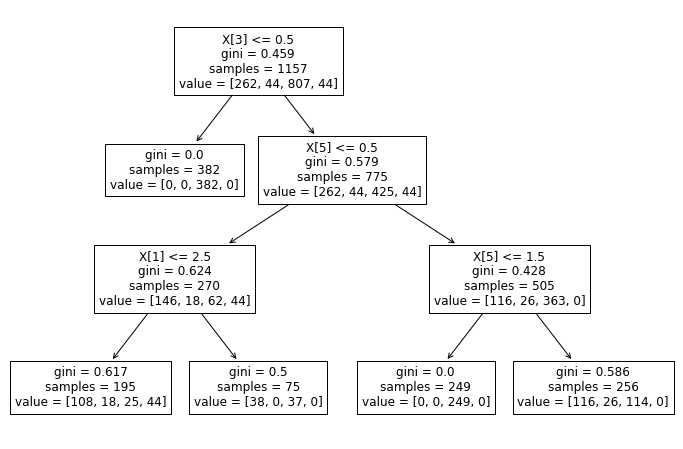

In [43]:
plt.figure(figsize=(12,8))
from sklearn import tree

tree.plot_tree(dt.fit(X_train, y_train)) 

In [44]:
import graphviz 

In [45]:
dot_data = tree.export_graphviz(dt, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

KeyError: ignored

In [46]:
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth = 3, random_state =3)
dt_en.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=3, splitter='best')

In [47]:
y_pred_en = dt_en.predict(X_test)

In [48]:
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))

Model accuracy score with criterion entropy: 0.7898


In [49]:

print('Training set score: {:.4f}'.format(dt_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(dt_en.score(X_test, y_test)))

Training set score: 0.7718
Test set score: 0.7898


[Text(251.10000000000002, 380.52, 'X[3] <= 0.5\nentropy = 1.206\nsamples = 1157\nvalue = [262, 44, 807, 44]'),
 Text(167.4, 271.8, 'entropy = 0.0\nsamples = 382\nvalue = [0, 0, 382, 0]'),
 Text(334.8, 271.8, 'X[5] <= 0.5\nentropy = 1.474\nsamples = 775\nvalue = [262, 44, 425, 44]'),
 Text(167.4, 163.07999999999998, 'X[1] <= 2.5\nentropy = 1.654\nsamples = 270\nvalue = [146, 18, 62, 44]'),
 Text(83.7, 54.360000000000014, 'entropy = 1.654\nsamples = 195\nvalue = [108, 18, 25, 44]'),
 Text(251.10000000000002, 54.360000000000014, 'entropy = 1.0\nsamples = 75\nvalue = [38, 0, 37, 0]'),
 Text(502.20000000000005, 163.07999999999998, 'X[5] <= 1.5\nentropy = 1.05\nsamples = 505\nvalue = [116, 26, 363, 0]'),
 Text(418.5, 54.360000000000014, 'entropy = 0.0\nsamples = 249\nvalue = [0, 0, 249, 0]'),
 Text(585.9, 54.360000000000014, 'entropy = 1.372\nsamples = 256\nvalue = [116, 26, 114, 0]')]

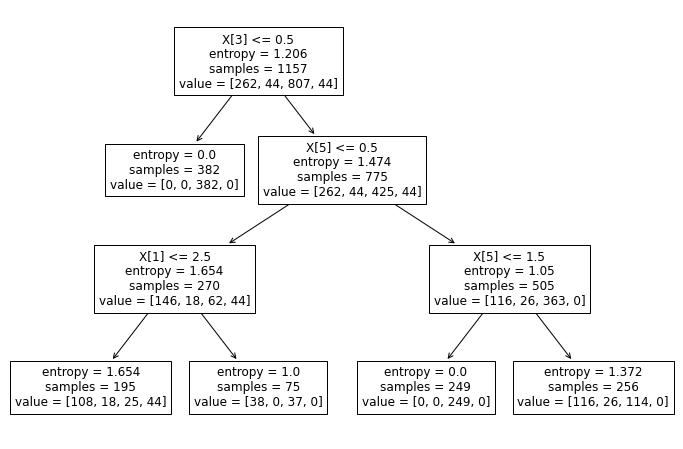

In [50]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(dt_en.fit(X_train, y_train)) 

In [51]:
import graphviz 
dot_data = tree.export_graphviz(dt_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=y_train,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

KeyError: ignored

In [52]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_en)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[122   0   0   0]
 [ 25   0   0   0]
 [ 74   0 329   0]
 [ 21   0   0   0]]
